In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('../data/full_text_sentences_new.txt', 'r') as f:
    all_texts = f.readlines()

In [3]:
text_length = [len(line.split(' ')) for line in all_texts]

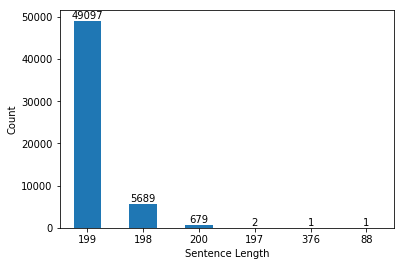

In [4]:
pd.Series(text_length).value_counts().plot(kind='bar', rot=0)
for idx, v in enumerate(pd.Series(text_length).value_counts()):
    plt.text(idx, v+0.05, '%d' % v, ha='center', va= 'bottom',fontsize=10)
    
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.show()

In [6]:
np.random.seed(123)
NUM_SAMPLES_PER = 5000
finetune_data1 = []
SENT_LEN = 50
for _ in range(NUM_SAMPLES_PER):
    i = np.random.randint(0, len(all_texts), 1)[0]
    _temp =  all_texts[i].split(' ')
    text_a = ' '.join(_temp[:SENT_LEN])
    try:
        text_b = ' '.join(_temp[SENT_LEN:2*SENT_LEN])+'\n'
    except:
        text_b = ' '.join(_temp[SENT_LEN:])
    finetune_data1.append(['1', str(i), str(i)+'_', text_a, text_b])
    
finetune_data1 = np.array(finetune_data1)

In [7]:
len(finetune_data1)

5000

In [8]:
all_texts[17837]

' and many inorganic solids can have regular structures where coordinating atoms are all at the same distance and they form the vertices of coordination geometrycoordination polyhedron however there are also many such solids where the structures are irregular in materials science the bulk coordination number of given atom in the interior of crystal lattice is the number of nearest neighbours to given atomcitation neededdatenovember 2014 for an atom at surface of crystal the surface coordination number is always less than the bulk coordination number the surface coordination number is dependent on the miller indexmiller indices of the surface in cubic crystal systembody-centered cubic bcc crystal the bulk coordination number is 8 whereas for the 100 surface the surface coordination number is 4citation neededdatenovember 2014lt---these definitions square with the usage in the literature but reference for the difinition is required--gt -aluminium has regular cubic close packed structure f

In [9]:
np.random.seed(123)
finetune_data2 = []
for _ in range(len(finetune_data1)):
    j = np.random.randint(0, len(all_texts), 1)[0]
    s = np.random.randint(0, len(all_texts), 1)[0]
    _temp_a =  all_texts[j].split(' ')
    _temp_b =  all_texts[s].split(' ')
    
    text_a = ' '.join(_temp_a[:SENT_LEN])
    try:
        text_b = ' '.join(_temp_b[SENT_LEN:2*SENT_LEN])+'\n'
    except:
        text_b = ' '.join(_temp_b[SENT_LEN:])
    if (j+1) != s:
        finetune_data2.append(['0', str(j), str(s), text_a, text_b])
    else:
        finetune_data2.append(['1', str(j), str(s), text_a, text_b])
        
finetune_data2 = np.array(finetune_data2)

In [10]:
dataset_all = np.concatenate((finetune_data1, finetune_data2), axis=0)

In [12]:
df = pd.DataFrame(dataset_all, columns=['label', 'id1', 'id2', 'sent1', 'sent2'])

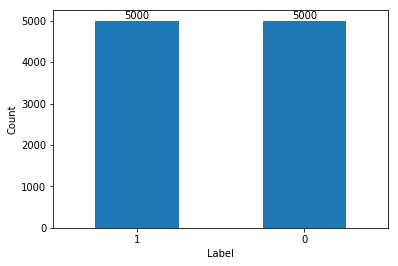

In [16]:
df['label'].value_counts().plot(kind='bar')
df['label'].value_counts().plot(kind='bar', rot=0)
for idx, v in enumerate(df['label'].value_counts()):
    plt.text(idx, v+0.05, '%d' % v, ha='center', va= 'bottom',fontsize=10)
    
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [10]:
np.random.seed(123)
np.random.shuffle(dataset_all)

with open('../data/train.tsv', 'w') as f:
    f.write("Quality	#1 ID	#2 ID	#1 String	#2 String\n")
    for i, record in enumerate(dataset_all[:int(len(dataset_all)*0.7)]):
        f.write(record[0]+'\t'+record[1]+'\t'+record[2]+'\t'+record[3]+'\t'+record[4])

with open('../data/dev.tsv', 'w') as f:
    f.write("Quality	#1 ID	#2 ID	#1 String	#2 String\n")
    for i, record in enumerate(dataset_all[int(len(dataset_all)*0.7): int(len(dataset_all)*0.9)]):
        f.write(record[0]+'\t'+record[1]+'\t'+record[2]+'\t'+record[3]+'\t'+record[4])
        
with open('../data/test.tsv', 'w') as f:
    f.write("Quality	#1 ID	#2 ID	#1 String	#2 String\n")
    for i, record in enumerate(dataset_all[int(len(dataset_all)*0.9):]):
        f.write(record[0]+'\t'+record[1]+'\t'+record[2]+'\t'+record[3]+'\t'+record[4])